In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [4]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# checking the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()


gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
#checking the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.09E-01'}, xlabel='total_score', ylabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=8.08E-01'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=1.58E-01'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=5.50E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=2.45E-02'}, xlabel='math score', ylabel='lunch'>],
        [<Axes: title={'center': 'F=2.33E-02'}, xlabel='math score', ylabel='test preparation course'>,
         <Axes: title={'center': 'F=1.75E-02'}, xlabel='math score', ylabel='status'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='grades'>,
         <Axes: >]], dtype=object)]

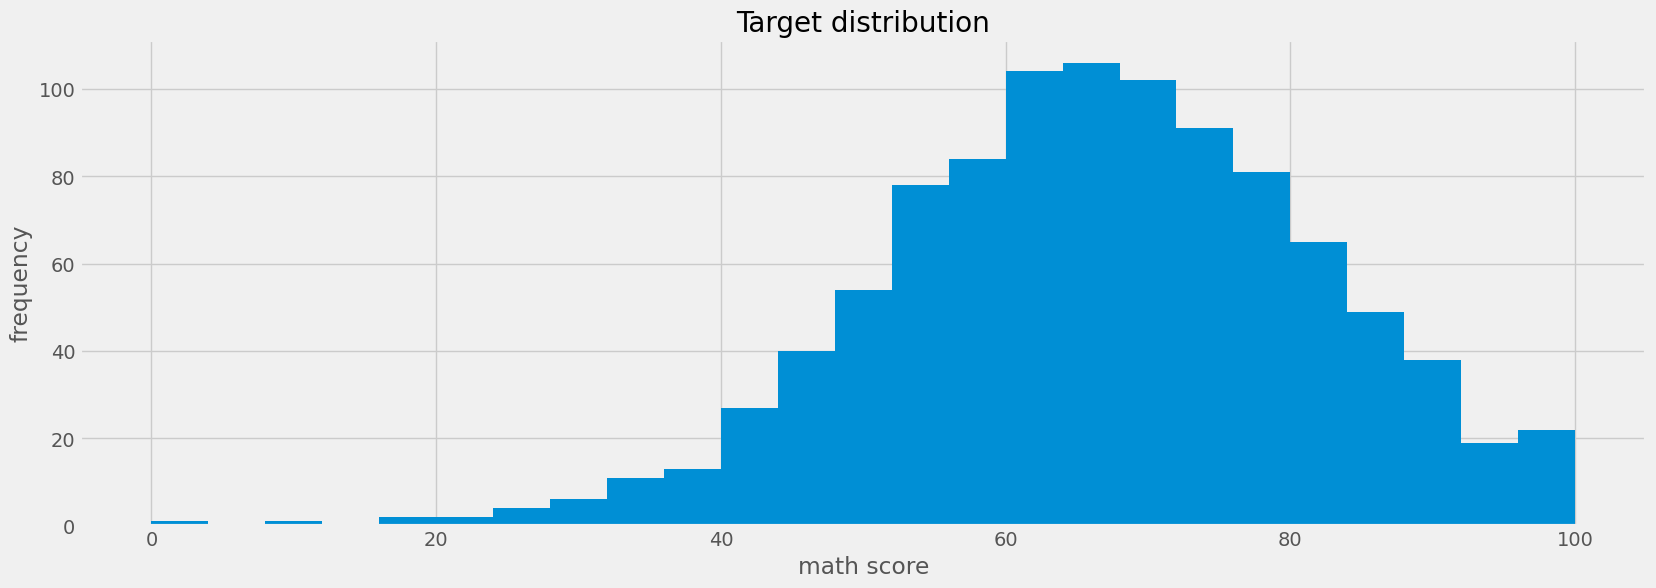

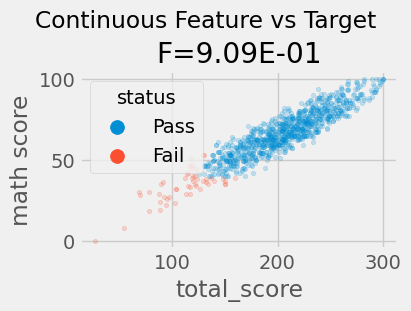

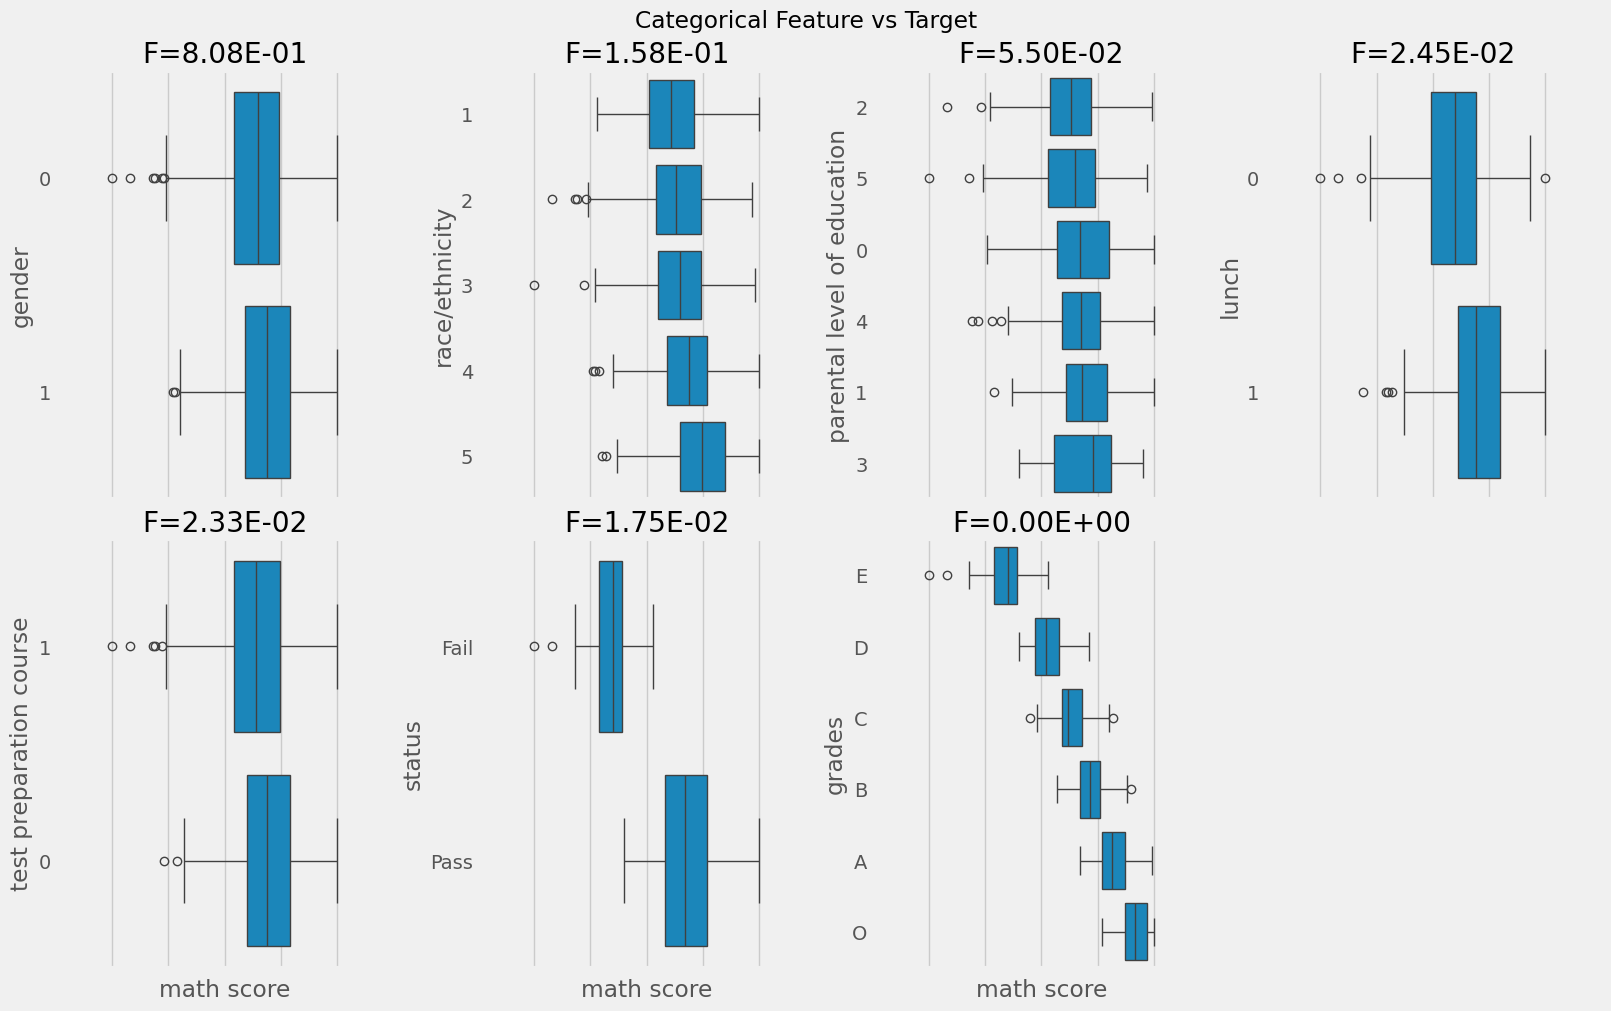

In [37]:
#comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=3.73E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.51E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=1.78E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=7.67E-03'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

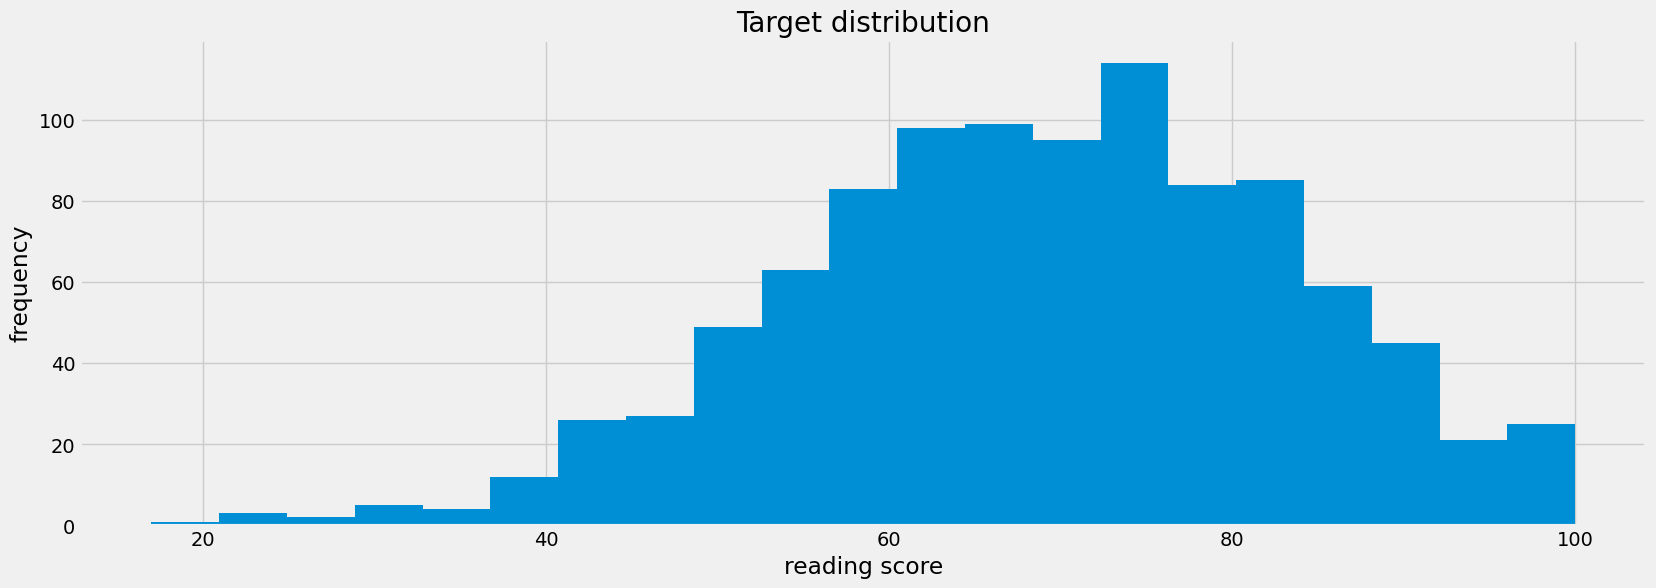

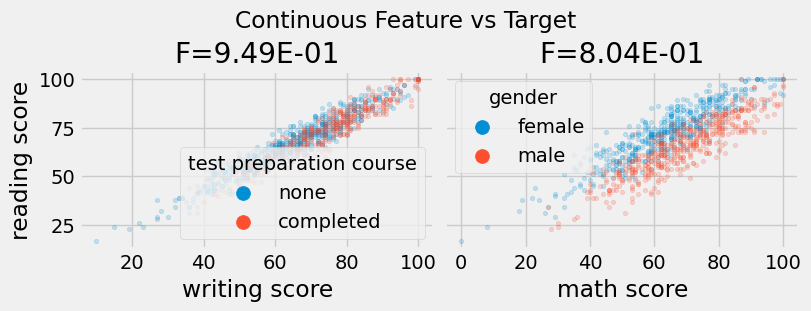

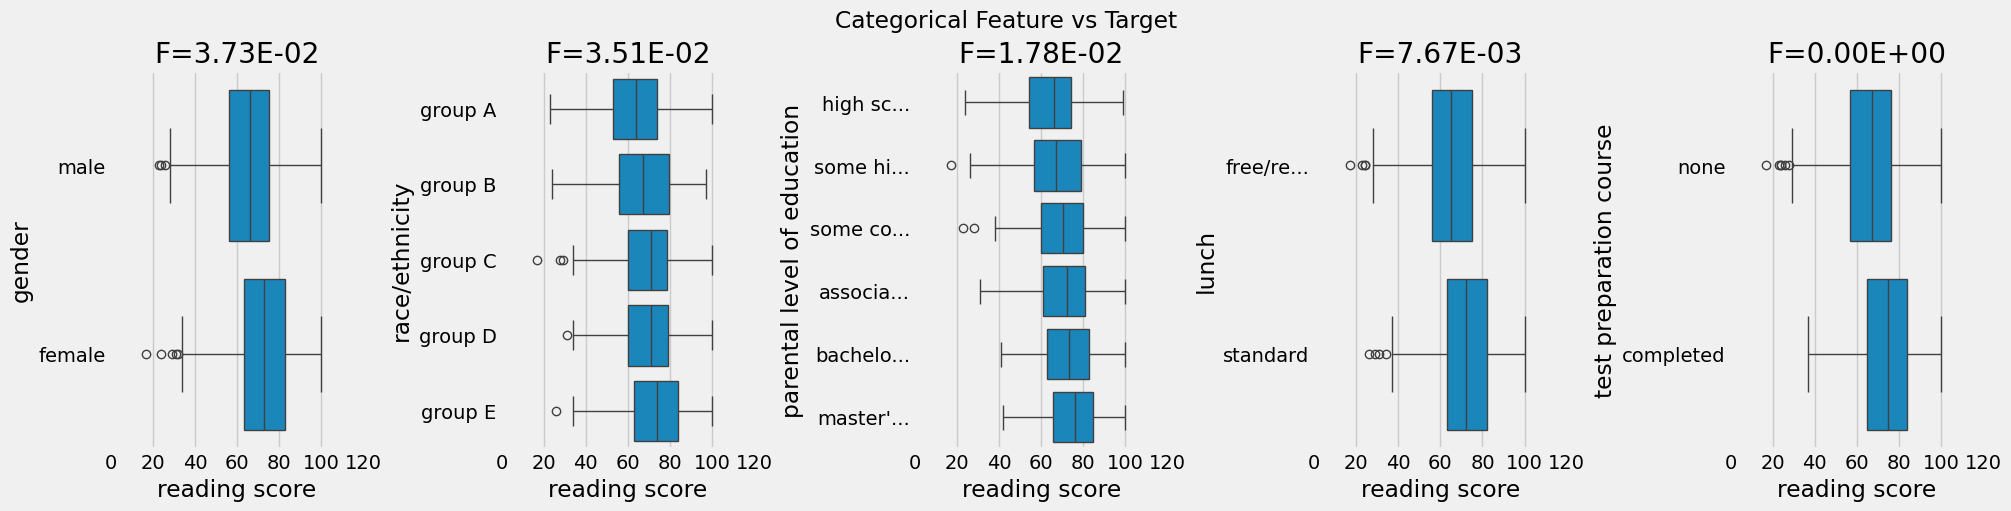

In [9]:
#Comparison of all other attributes with respect to Reading Marks :
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [10]:
#checking the Effect of Lunch on Student’s Performnce
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [11]:
#check the Effect of Test Preparation Course on Scores
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

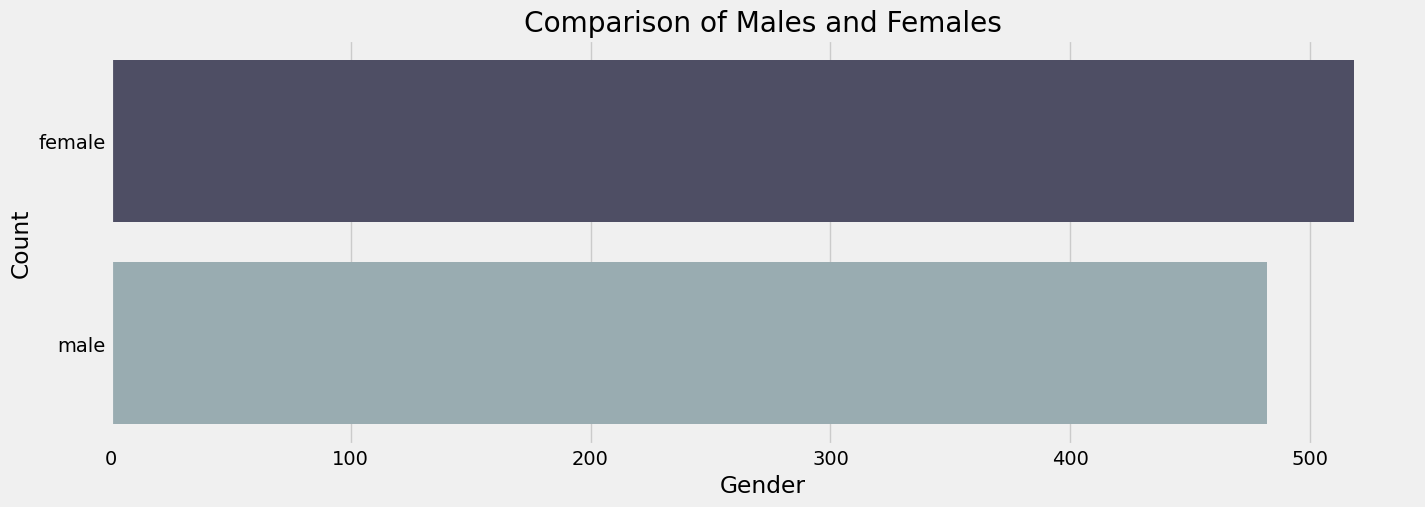

In [12]:
#Visualizing the number of male and female in the data set
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

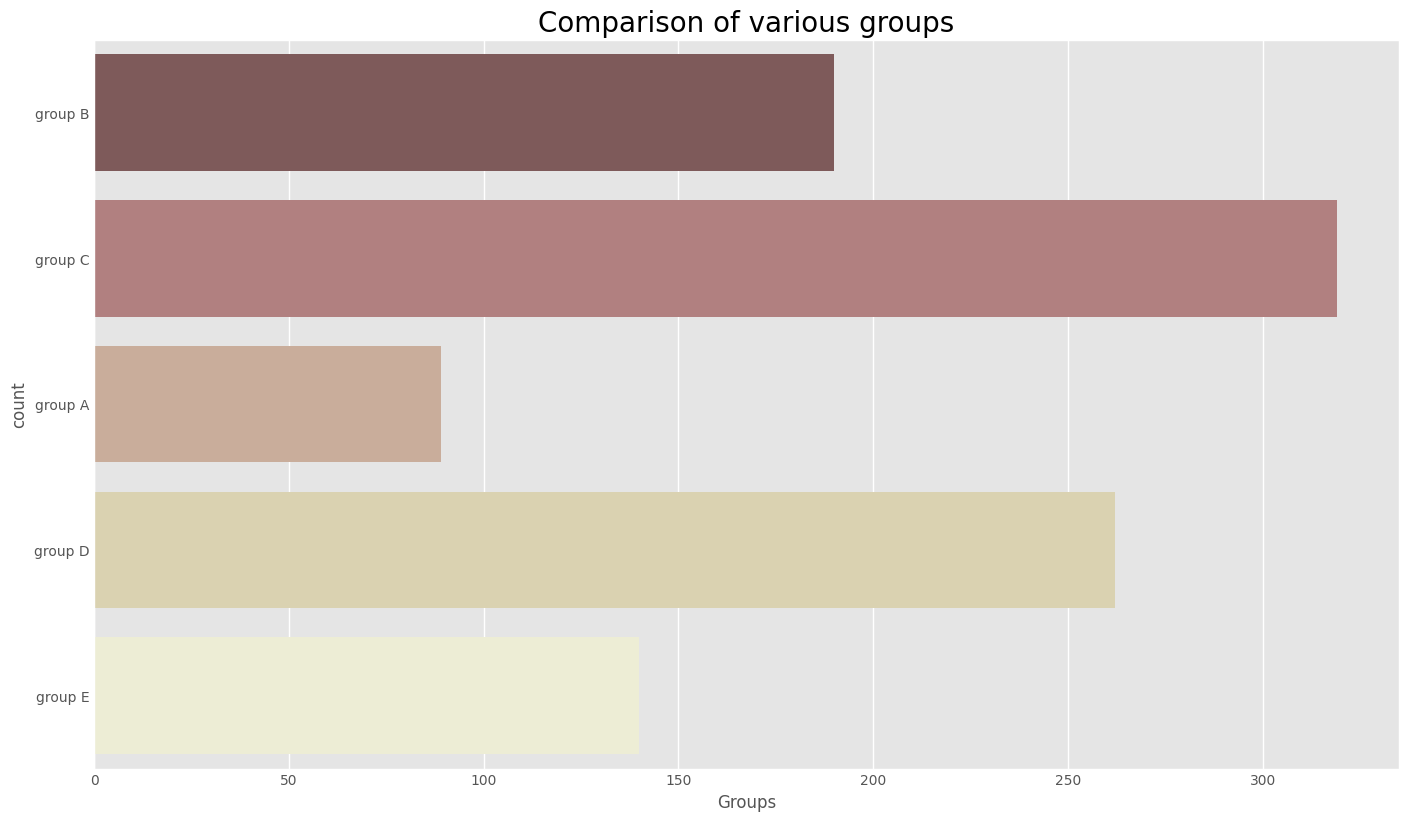

In [13]:
#Visualizing the different groups in the data set
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

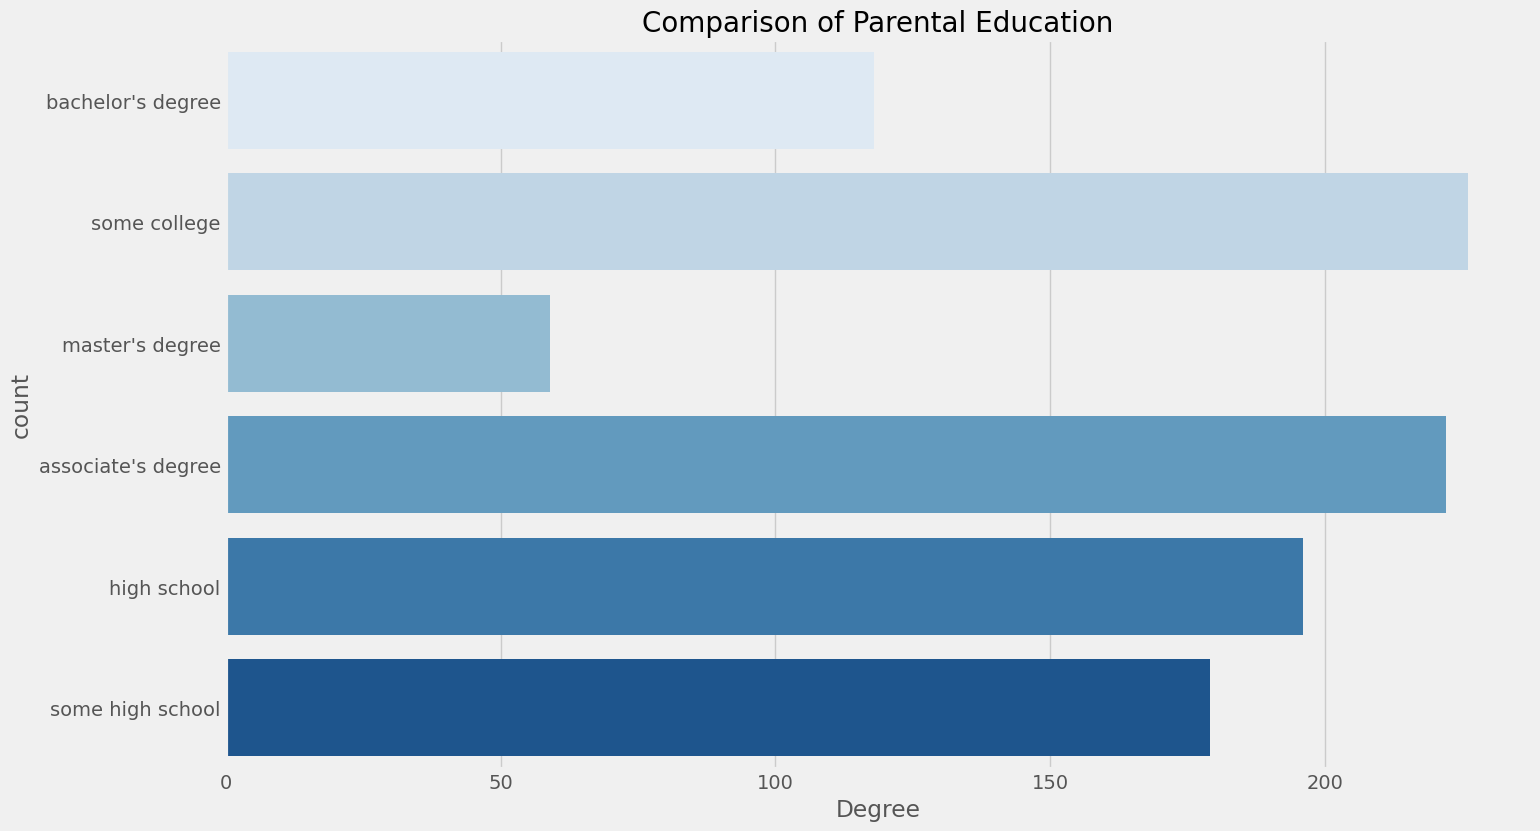

In [14]:
#Visualizing the different parental education levels


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

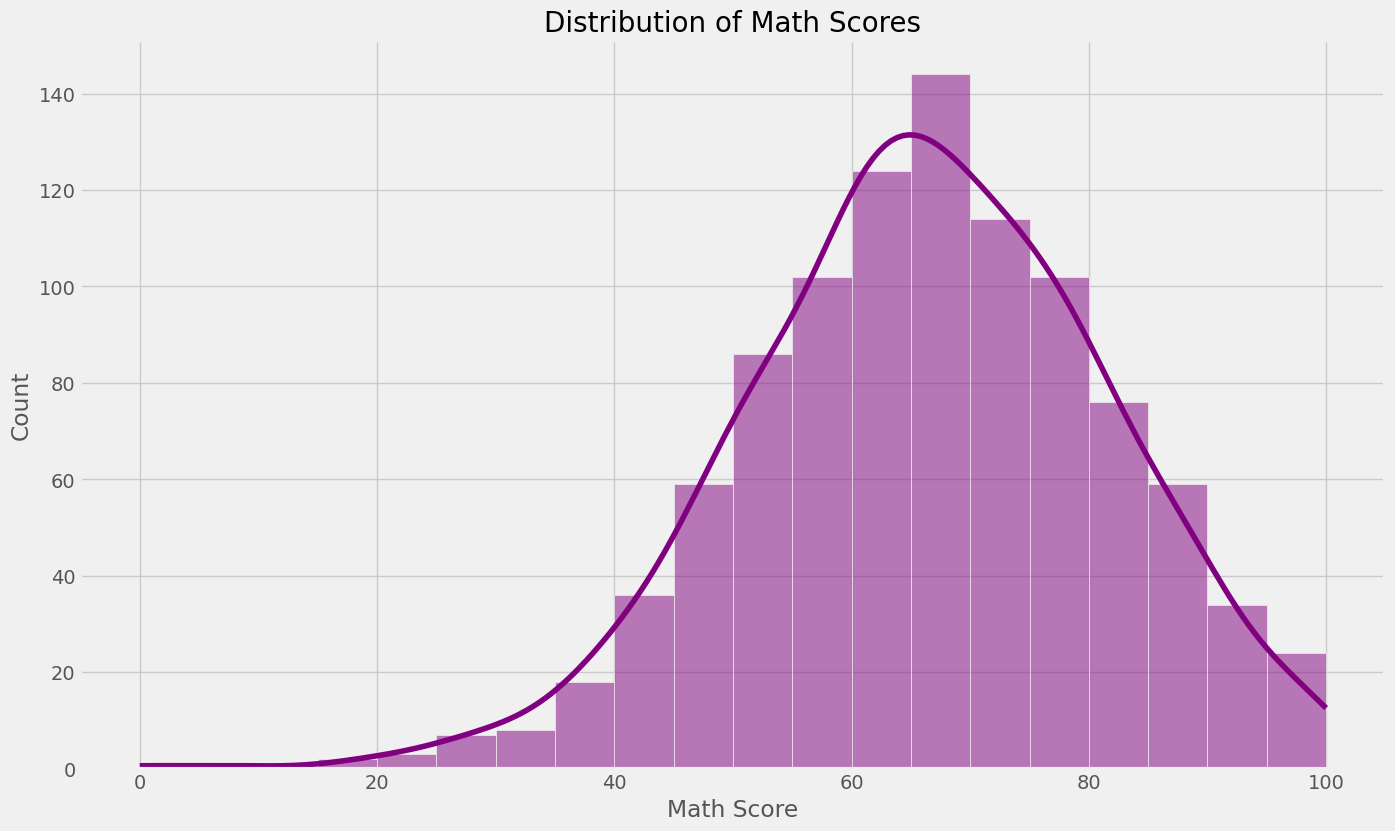

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.histplot(data['math score'], bins=20, color='purple', kde=True)
plt.title('Distribution of Math Scores', fontweight=30, fontsize=20)
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()


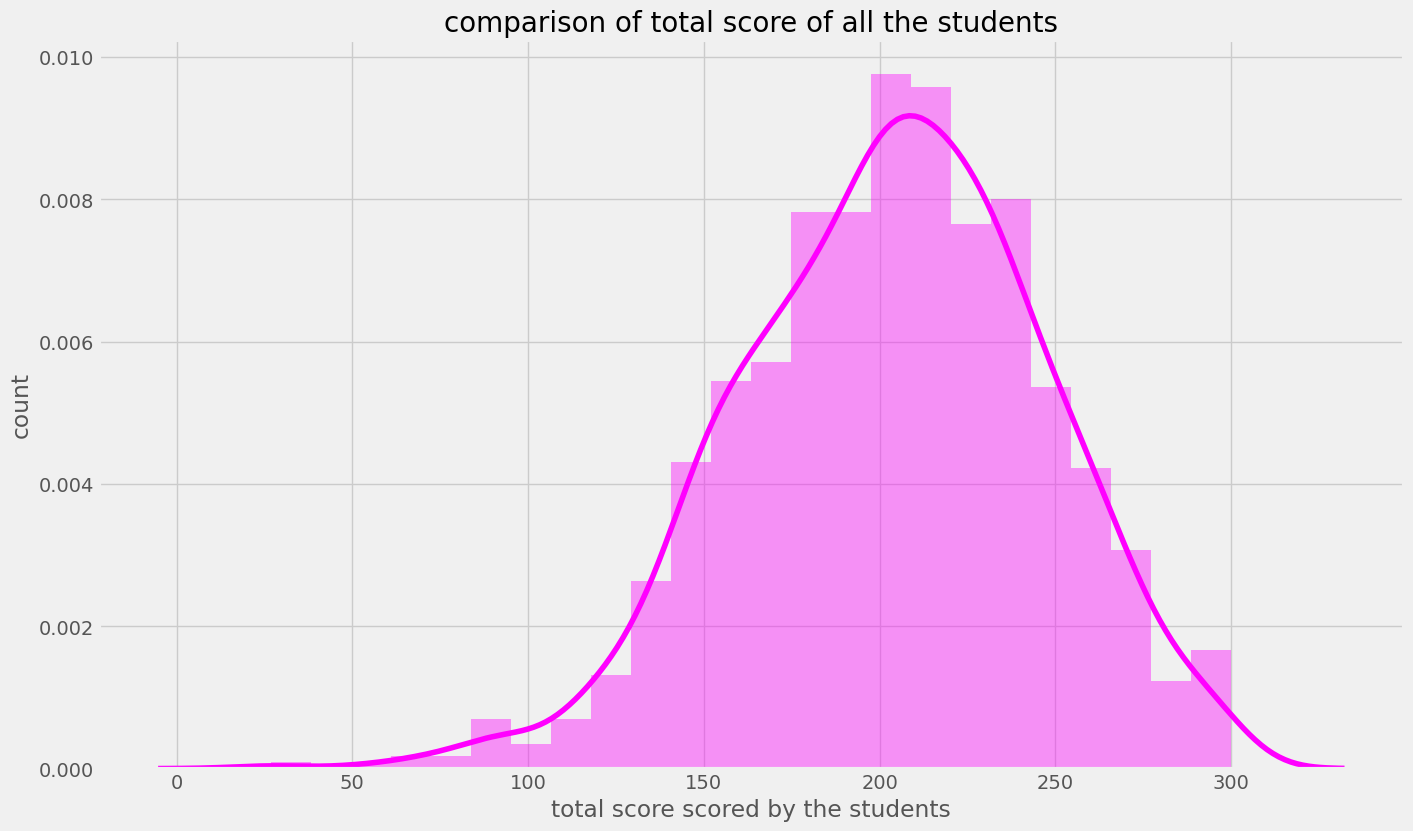

In [16]:
#Computing the total score for each student

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

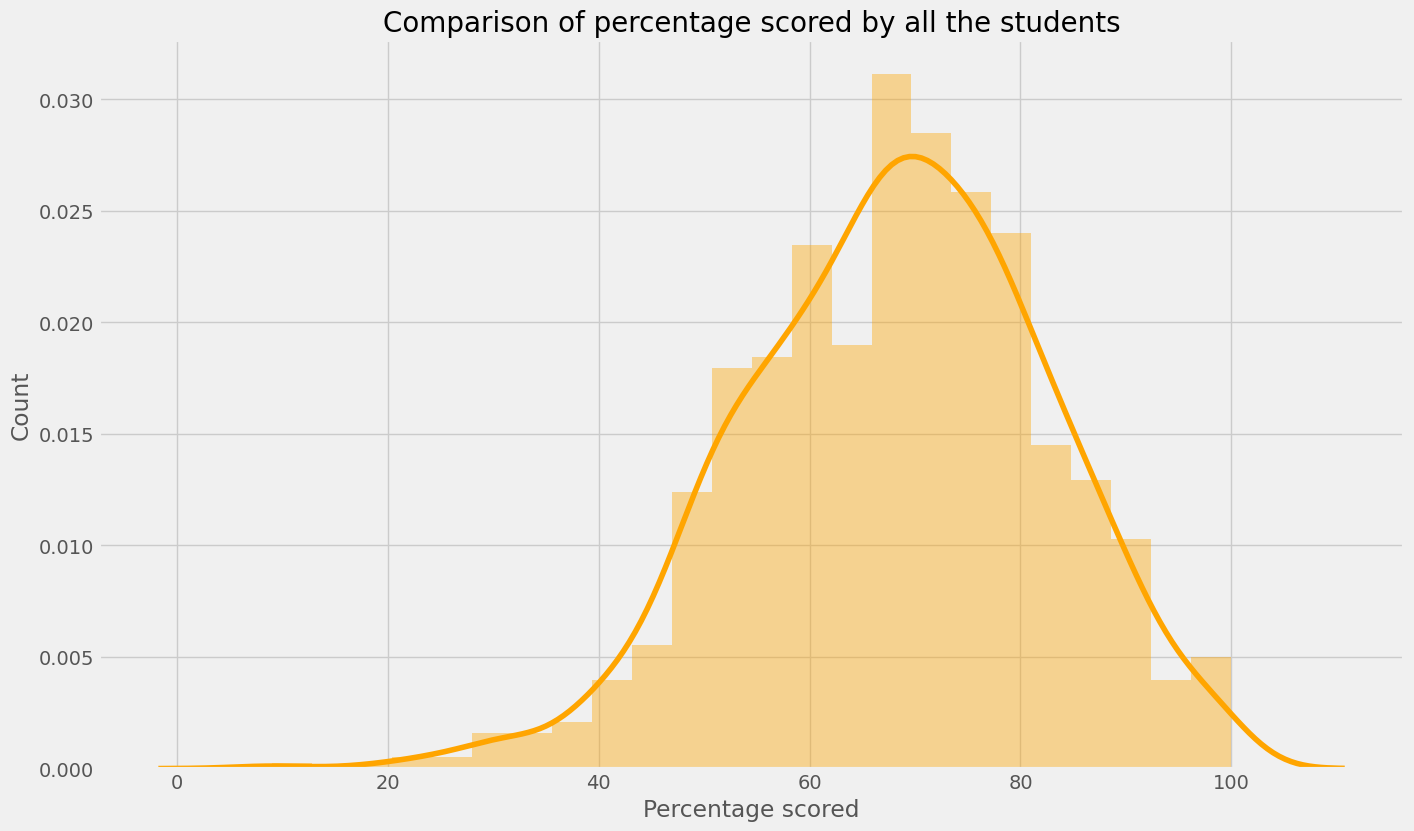

In [17]:
# Computing percentage for each of the students
from math import * 

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()


In [18]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

# label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = data.apply(lambda x: 1 if x['math score'] >= 40 else 0, axis=1)

# label encoding for pass_reading
data['pass_reading'] = data.apply(lambda x: 1 if x['reading score'] >= 40 else 0, axis=1)

# label encoding for pass_writing
data['pass_writing'] = data.apply(lambda x: 1 if x['writing score'] >= 40 else 0, axis=1)

# label encoding for status
data['status'] = data.apply(lambda x: 'Pass' if (x['pass_math'] == 1 and x['pass_reading'] == 1 and x['pass_writing'] == 1) else 'Fail', axis=1)



In [19]:
#Splitting the dependent and independent variables
x = data.iloc[:,:13]
y = data.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 13)
(1000,)


In [20]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,pass_math,pass_reading,pass_writing
0,0,2,1,1,1,72,72,74,218,73.0,1,1,1
1,0,3,4,1,0,69,90,88,247,83.0,1,1,1
2,0,2,3,1,1,90,95,93,278,93.0,1,1,1
3,1,1,0,0,1,47,57,44,148,50.0,1,1,1
4,1,3,4,1,1,76,78,75,229,77.0,1,1,1


In [22]:
#Splitting the data set into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 13)
(700,)
(300, 13)
(300,)


In [23]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [24]:
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.46819514e-01 2.15537052e-01 2.02997329e-01 1.19680741e-01
 9.02625138e-02 6.91530182e-02 3.77769789e-02 1.15056869e-02
 3.30791098e-03 1.94347892e-03 1.00946454e-03 6.31216352e-06
 6.13079865e-33]


In [25]:
#Modelling
#Logistic Regression

from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9742857142857143
Testing Accuracy : 0.95


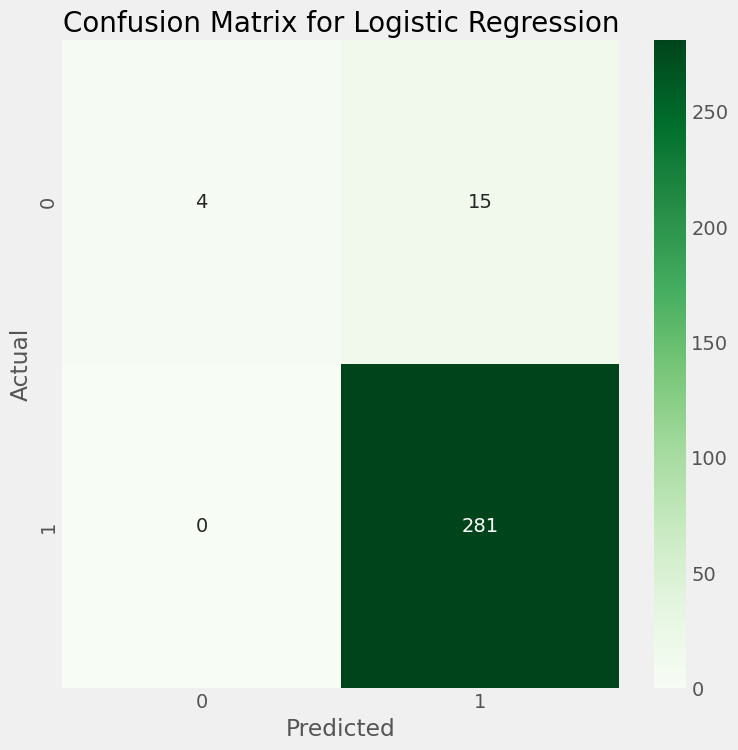

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Logistic Regression', fontweight=30, fontsize=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
from sklearn.svm import SVC

# creating an SVM classifier
model = SVC()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.98
Testing Accuracy : 0.9633333333333334


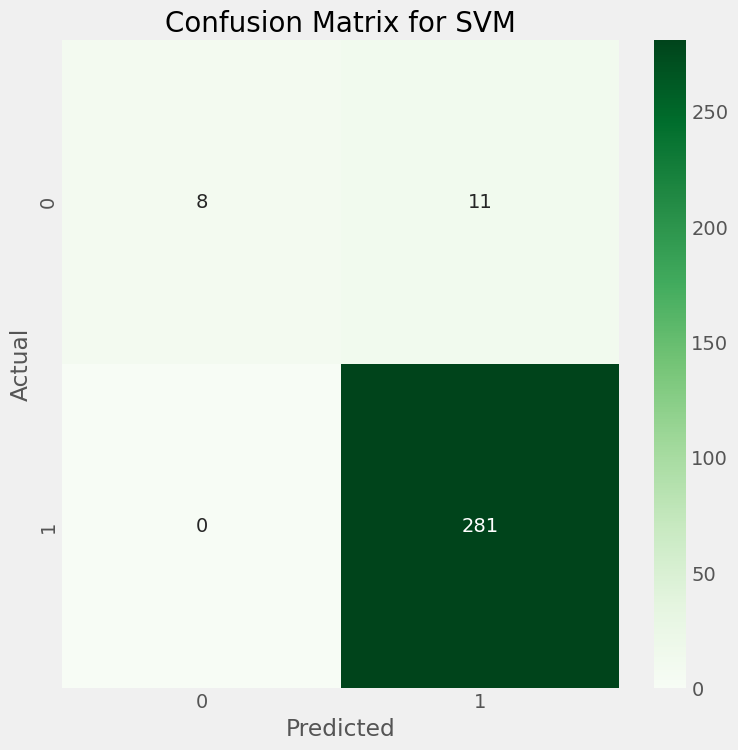

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for SVM', fontweight=30, fontsize=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
def getgrade(percentage,status):
    if status == 'Fail':
        return 'E'
    if percentage >= 90:
        return 'O'
    if percentage >= 80:
        return 'A'
    if percentage >= 70:
        return 'B'
    if percentage >= 60:
        return 'C'
    if percentage >= 40:
        return 'D'
    else:
        return 'E'
data['grades'] = data.apply(lambda x: getgrade(x['percentage'],x['status']), axis=1)

data['grades'].value_counts()

grades
B    260
C    252
D    223
A    156
O     58
E     51
Name: count, dtype: int64

In [34]:
x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


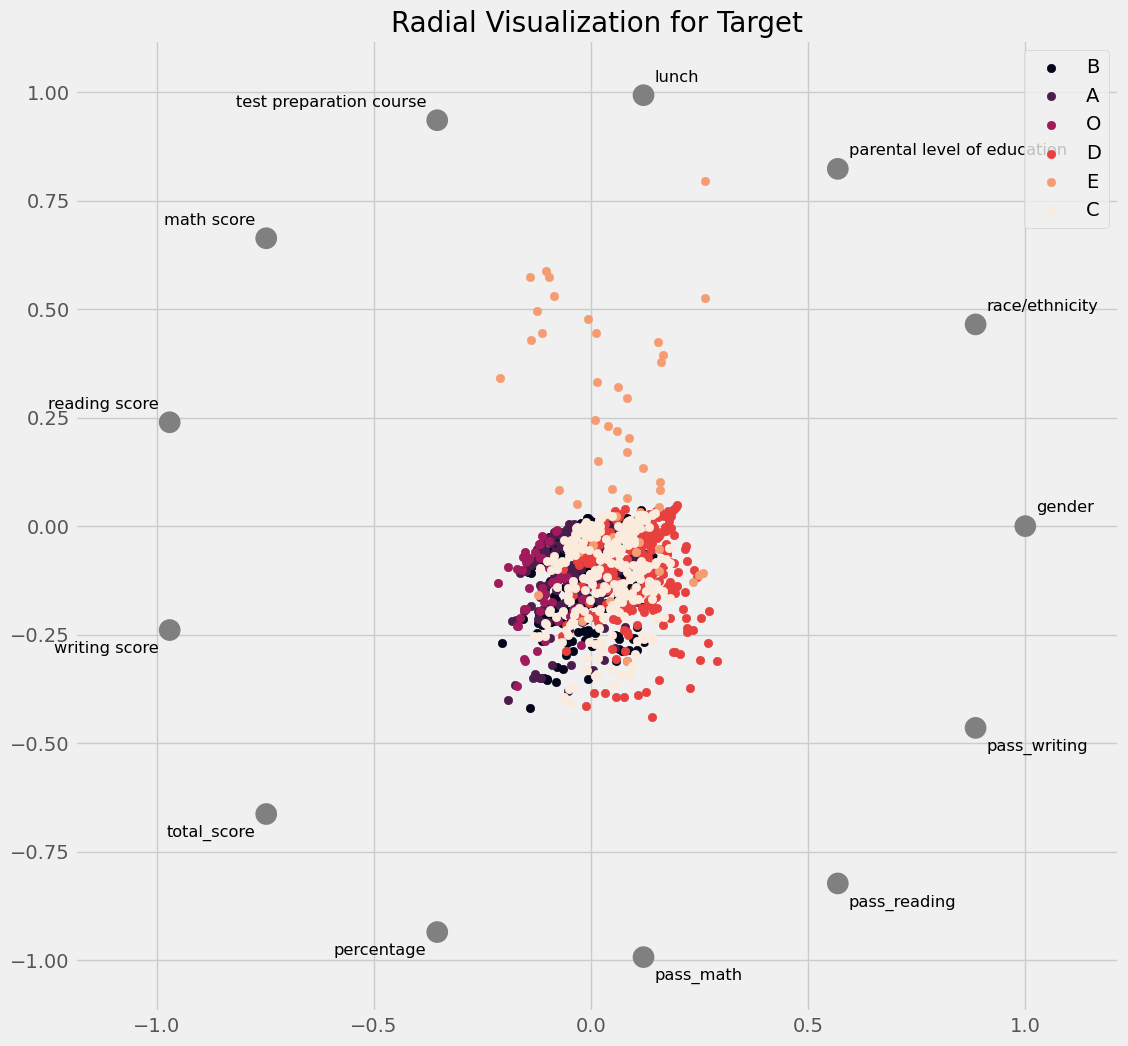

In [35]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

In [36]:
#It gives a clear Idea that Students getting very low grades have high correlation on Lunch and Parental Education